1. Understanding the Dataset
First, let's look at what each file contains:

links.csv: Likely contains mappings between movie IDs in the dataset and external movie databases (e.g., IMDb or TMDb IDs).

movies.csv: Contains movie details like movie ID, title, and genres.

ratings.csv: Contains user ratings for movies, including user IDs, movie IDs, ratings, and timestamps.

tags.csv: Contains user-generated tags for movies, including user IDs, movie IDs, tags, and timestamps.

Loading the Data

In [1]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/movie_data.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [3]:
import pandas as pd

# Load the datasets
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')


In [4]:
movies = pd.read_csv('movies.csv')
print(movies.shape)



(9742, 3)


In [5]:
ratings = pd.read_csv('ratings.csv')
print(ratings.shape)

(100836, 4)


In [6]:
unique_user_ids = ratings['userId'].nunique()
print(unique_user_ids)


610


In [7]:
movie_ratings_count = ratings.groupby('movieId').size()
most_rated_movie_id = movie_ratings_count.idxmax()
most_rated_movie = movies[movies['movieId'] == most_rated_movie_id]['title'].values[0]
print(most_rated_movie)


Forrest Gump (1994)


In [8]:
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag'].unique()
print(matrix_tags)


['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [9]:
terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
average_rating = ratings[ratings['movieId'] == terminator_movie_id]['rating'].mean()
print(average_rating)


3.970982142857143


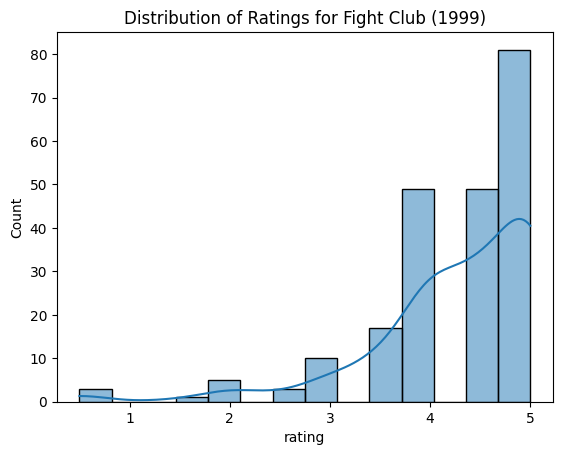

In [10]:
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
ratings_fight_club = ratings[ratings['movieId'] == fight_club_movie_id]['rating']

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ratings_fight_club, kde=True)
plt.title('Distribution of Ratings for Fight Club (1999)')
plt.show()


In [11]:
# Step 1: Group by movieId and calculate average rating
movie_avg_ratings = ratings.groupby('movieId')['rating'].mean()

# Step 2: Join with movies data
movies_with_avg_ratings = movies.merge(movie_avg_ratings, on='movieId')

# Step 3: Filter movies with more than 50 ratings
ratings_count = ratings.groupby('movieId').size()
popular_movies = movies_with_avg_ratings[movies_with_avg_ratings['movieId'].isin(ratings_count[ratings_count > 50].index)]

# Find the movie with the highest average rating
most_popular_movie_id = popular_movies.loc[popular_movies['rating'].idxmax()]['movieId']
most_popular_movie = popular_movies[popular_movies['movieId'] == most_popular_movie_id]['title'].values[0]
print(most_popular_movie)


Shawshank Redemption, The (1994)


In [12]:
# Find top 5 movies based on number of ratings
top_rated_movies = ratings_count[ratings_count > 50].nlargest(5).index
top_rated_movies_df = movies[movies['movieId'].isin(top_rated_movies)]
print(top_rated_movies_df[['title']])


                                 title
257                Pulp Fiction (1994)
277   Shawshank Redemption, The (1994)
314                Forrest Gump (1994)
510   Silence of the Lambs, The (1991)
1939                Matrix, The (1999)


In [13]:
# Check the Sci-Fi movies and their ratings count
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]
sci_fi_movie_ids = sci_fi_movies['movieId'].values
sci_fi_movie_ratings_count = ratings[ratings['movieId'].isin(sci_fi_movie_ids)].groupby('movieId').size()

# Find the top 3 Sci-Fi movies based on number of ratings
top_sci_fi_movies = sci_fi_movie_ratings_count.nlargest(3)
print(top_sci_fi_movies)

# Get the titles of the top 3 Sci-Fi movies
top_sci_fi_movie_titles = movies[movies['movieId'].isin(top_sci_fi_movies.index)]['title']
print(top_sci_fi_movie_titles)


movieId
2571    278
260     251
480     238
dtype: int64
224     Star Wars: Episode IV - A New Hope (1977)
418                          Jurassic Park (1993)
1939                           Matrix, The (1999)
Name: title, dtype: object


In [14]:
# Find the third most popular Sci-Fi movie based on user ratings
if len(top_sci_fi_movie_titles) >= 3:
    third_most_popular_sci_fi = top_sci_fi_movie_titles.iloc[2]
    print(third_most_popular_sci_fi)


Matrix, The (1999)


In [15]:
# Filter Sci-Fi movies
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]

# Get the movieIds
sci_fi_movie_ids = sci_fi_movies['movieId'].values

# Count ratings for Sci-Fi movies
sci_fi_movie_ratings_count = ratings[ratings['movieId'].isin(sci_fi_movie_ids)].groupby('movieId').size()

# Find the third most popular Sci-Fi movie
top_sci_fi_movies = sci_fi_movie_ratings_count.nlargest(3).index
third_most_popular_sci_fi = movies[movies['movieId'].isin(top_sci_fi_movies)].iloc[2]['title']
print(third_most_popular_sci_fi)


Matrix, The (1999)


In [17]:
print("Links Data:")
print(links.head())

print("\nMovies Data:")
print(movies.head())

print("\nRatings Data:")
print(ratings.head())

print("\nTags Data:")
print(tags.head())


Links Data:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4     

Dataset Information

In [18]:
print("Links Data Info:")
print(links.info())

print("\nMovies Data Info:")
print(movies.info())

print("\nRatings Data Info:")
print(ratings.info())

print("\nTags Data Info:")
print(tags.info())


Links Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

Movies Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movie

Check for Missing Values

In [19]:
print("Links Data Missing Values:")
print(links.isnull().sum())

print("\nMovies Data Missing Values:")
print(movies.isnull().sum())

print("\nRatings Data Missing Values:")
print(ratings.isnull().sum())

print("\nTags Data Missing Values:")
print(tags.isnull().sum())


Links Data Missing Values:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Movies Data Missing Values:
movieId    0
title      0
genres     0
dtype: int64

Ratings Data Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Tags Data Missing Values:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


Summary Statistics

In [20]:
import pandas as pd

# Load the datasets
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

# Display summary statistics for the ratings data
print("Ratings Data Statistics:")
print(ratings.describe())

# Display summary statistics for the tags data
print("\nTags Data Statistics:")
print(tags.describe())


Ratings Data Statistics:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

Tags Data Statistics:
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.0000

In [21]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('movies.csv')  # Movie information with movieId, title, genres
ratings = pd.read_csv('ratings.csv')  # IMDb ratings with movieId, rating

# Merge datasets on movieId
merged_data = pd.merge(movies, ratings, on='movieId')

# Find the movie with the highest IMDb rating
highest_rated_movie = merged_data.loc[merged_data['rating'].idxmax()]
highest_rated_movieId = highest_rated_movie['movieId']

# Filter Sci-Fi movies
sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]
highest_rated_sci_fi_movieId = highest_rated_sci_fi_movie['movieId']

print(f"MovieId with the highest IMDb rating: {highest_rated_movieId}")
print(f"MovieId of the 'Sci-Fi' movie with the highest IMDb rating: {highest_rated_sci_fi_movieId}")


MovieId with the highest IMDb rating: 1
MovieId of the 'Sci-Fi' movie with the highest IMDb rating: 24
